# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Nanda Safiq Alfiansyah
- **Email:** 2133401
- **ID Dicoding:** Nanda Safiq Alfiansyah


## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weather situation)?
- Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja (working day) dan hari libur (holiday)?

## 1. Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 2. Data Wrangling

###2.1. Gathering Data

2.1.1. day

In [4]:
url = "https://drive.google.com/file/d/1wpz87P81pyMu_8fhqI8huwIJuEp60jbX/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
day_df = pd.read_csv(download_url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2.1.2. hour


In [7]:
url = "https://drive.google.com/file/d/14oE5I_9y00Bn0wvC0XMXCrATpTbe8ekU/view?usp=drive_link"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
hour_df = pd.read_csv(download_url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
# Check info and missing values for day_df
print("Day DataFrame Info:")
print(day_df.info())
print("\nMissing values in day_df:")
print(day_df.isnull().sum())

# Check info and missing values for hour_df
print("\nHour DataFrame Info:")
print(hour_df.info())
print("\nMissing values in hour_df:")
print(hour_df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in day_df:", day_df.duplicated().sum())
print("Duplicate rows in hour_df:", hour_df.duplicated().sum())

# Check descriptive statistics
print("\nDescriptive statistics for day_df:")
print(day_df.describe())

Day DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Missing values in day_d

### Cleaning Data

In [9]:
# Convert date columns to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Map categorical values to meaningful labels
# Season mapping
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

# Weather situation mapping
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice/Snow'
}
day_df['weathersit'] = day_df['weathersit'].map(weather_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

# Weekday mapping
weekday_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
day_df['weekday'] = day_df['weekday'].map(weekday_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)

# Working day mapping
day_df['workingday'] = day_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend/Holiday')
hour_df['workingday'] = hour_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend/Holiday')

# Holiday mapping
day_df['holiday'] = day_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')
hour_df['holiday'] = hour_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Check cleaned data
print(day_df.head())
print(hour_df.head())

   instant     dteday  season  yr  mnth  hr      holiday   weekday  \
0        1 2011-01-01  Spring   0     1   0  Non-Holiday  Saturday   
1        2 2011-01-01  Spring   0     1   1  Non-Holiday  Saturday   
2        3 2011-01-01  Spring   0     1   2  Non-Holiday  Saturday   
3        4 2011-01-01  Spring   0     1   3  Non-Holiday  Saturday   
4        5 2011-01-01  Spring   0     1   4  Non-Holiday  Saturday   

        workingday        weathersit  temp   atemp   hum  windspeed  casual  \
0  Weekend/Holiday  Clear/Few clouds  0.24  0.2879  0.81        0.0       3   
1  Weekend/Holiday  Clear/Few clouds  0.22  0.2727  0.80        0.0       8   
2  Weekend/Holiday  Clear/Few clouds  0.22  0.2727  0.80        0.0       5   
3  Weekend/Holiday  Clear/Few clouds  0.24  0.2879  0.75        0.0       3   
4  Weekend/Holiday  Clear/Few clouds  0.24  0.2879  0.75        0.0       0   

   registered  cnt  
0          13   16  
1          32   40  
2          27   32  
3          10   13  

## Exploratory Data Analysis (EDA)

### Explore ...

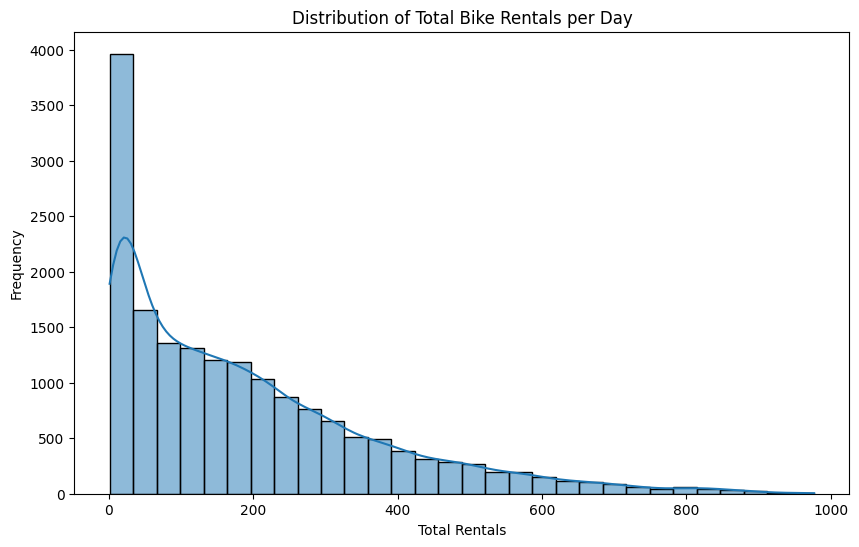

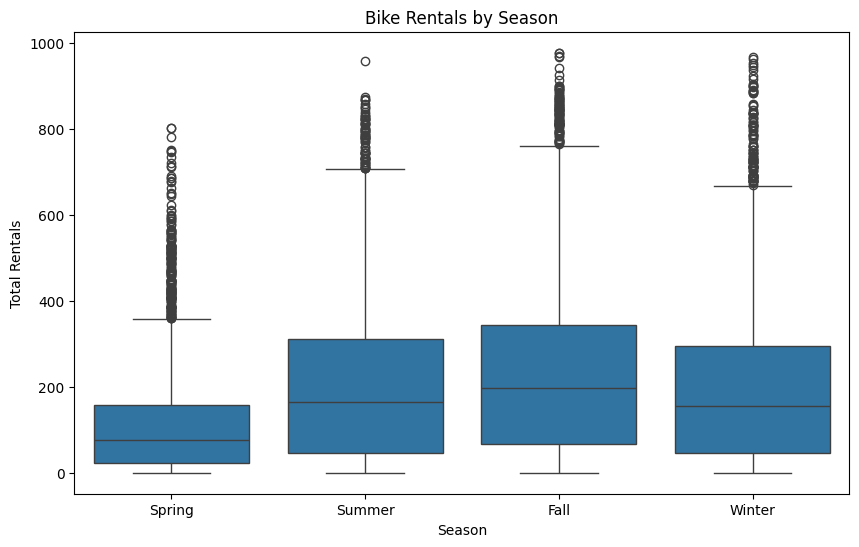

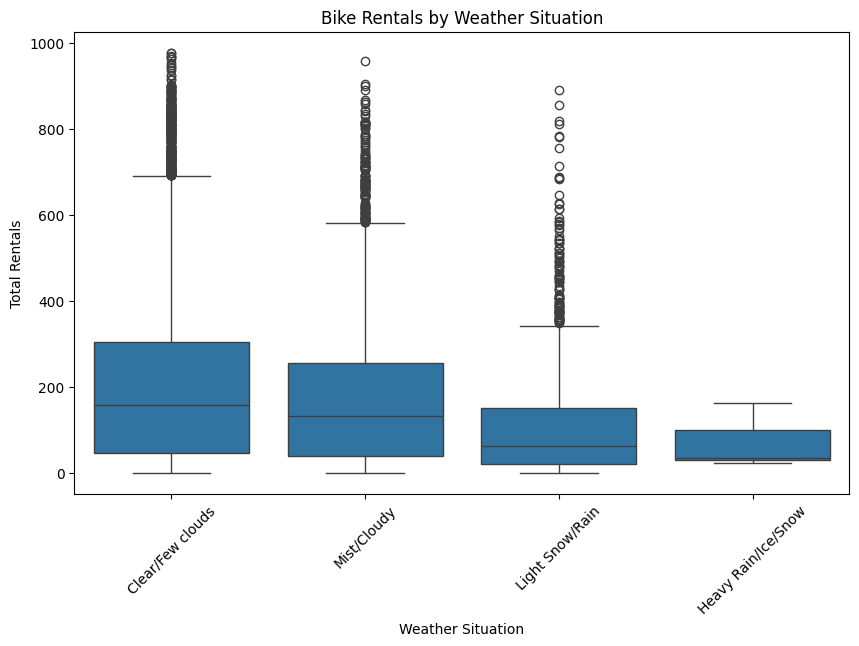

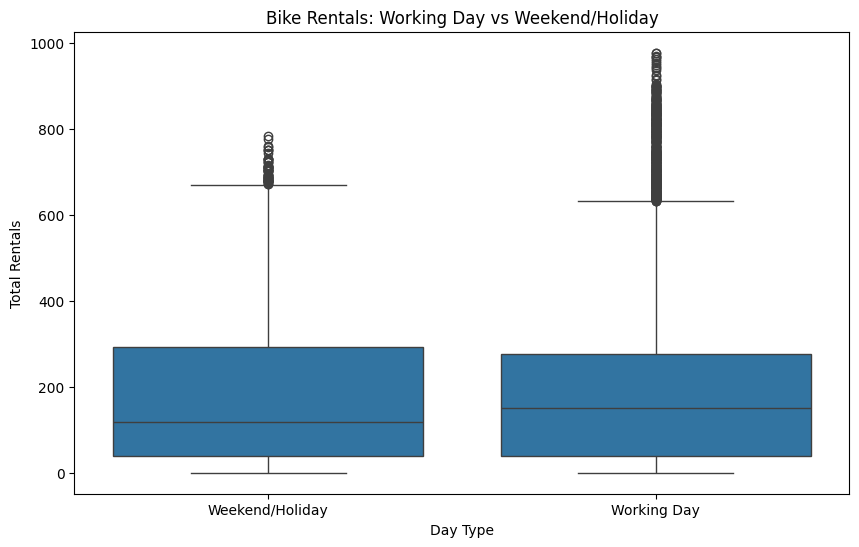

In [10]:
# Explore distribution of bike rentals
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals per Day')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

# Explore seasonal patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

# Explore weather patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df)
plt.title('Bike Rentals by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.show()

# Explore working day vs holiday patterns
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Bike Rentals: Working Day vs Weekend/Holiday')
plt.xlabel('Day Type')
plt.ylabel('Total Rentals')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weather situation)?

<ipython-input-11-53e7f6ecd823>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, estimator=np.mean, ci=None)
<ipython-input-11-53e7f6ecd823>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.mean, ci=None)


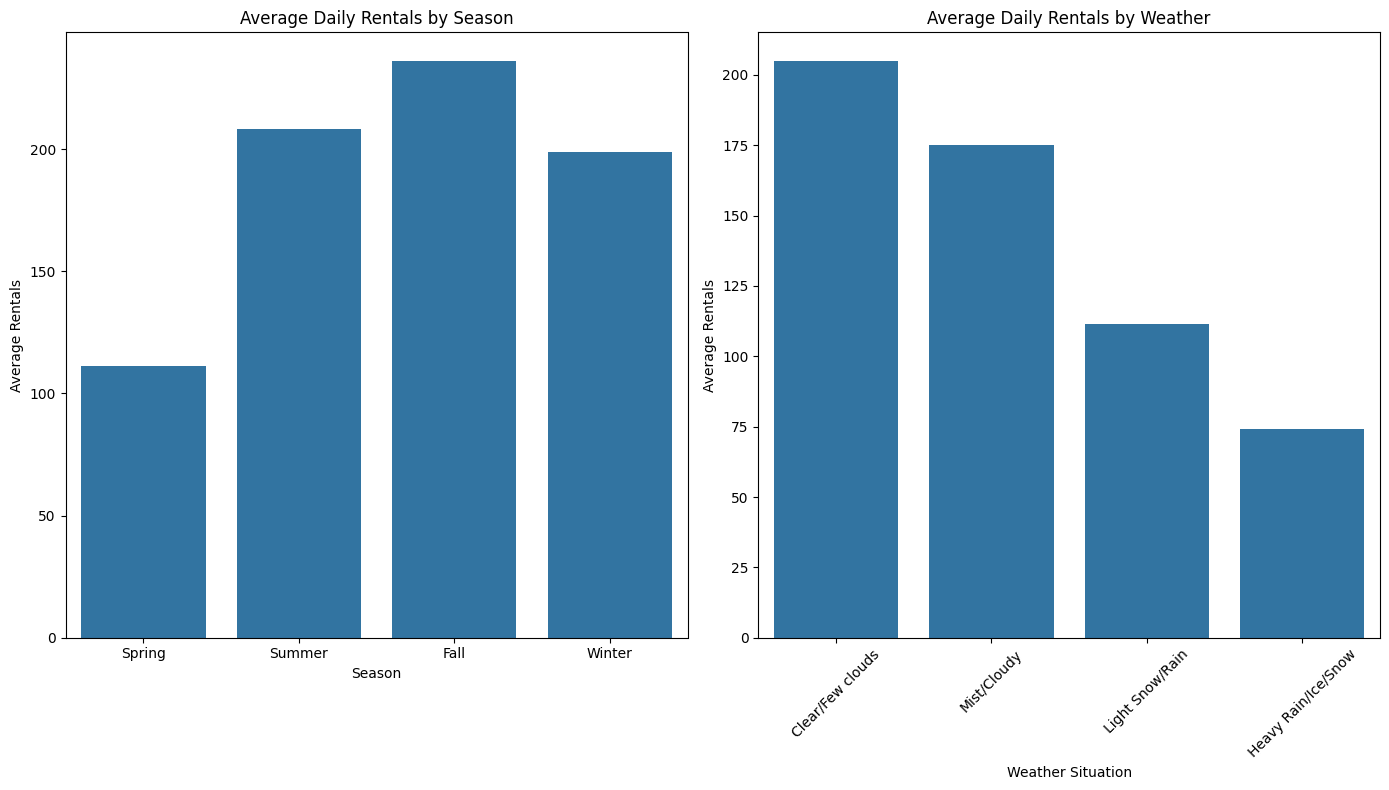

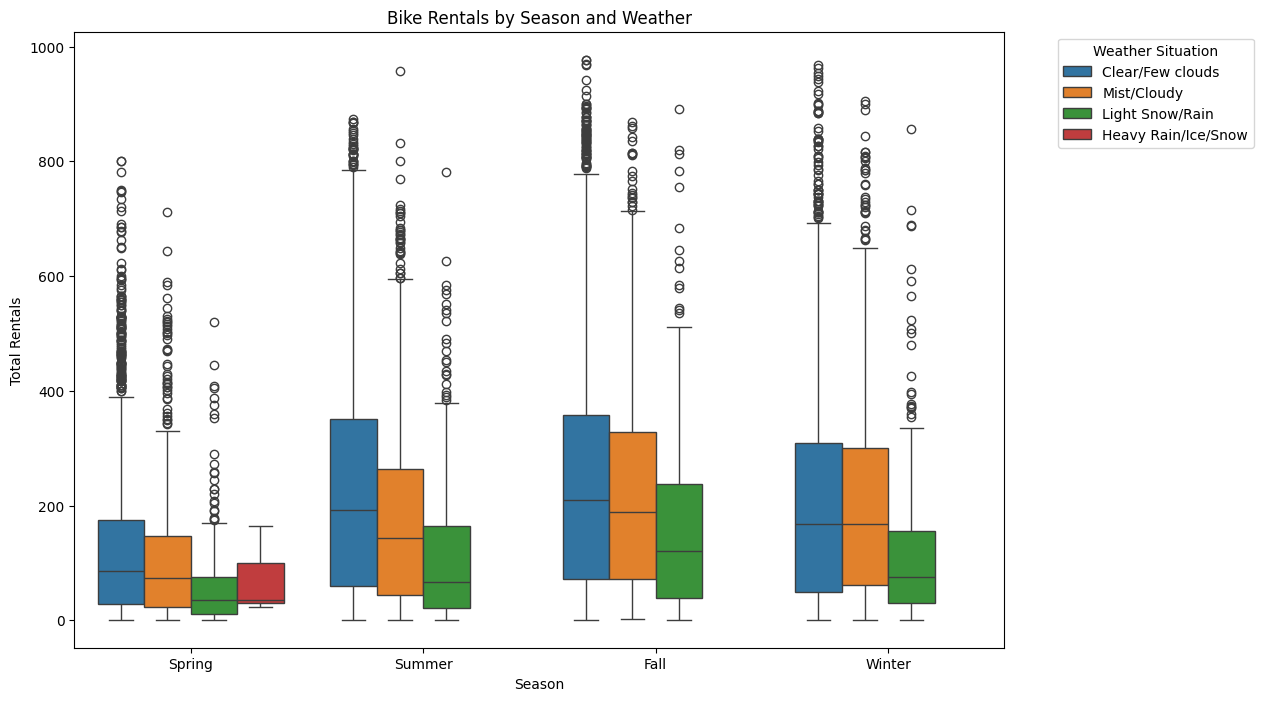

In [11]:
# Visualization for season and weather impact
plt.figure(figsize=(14, 8))

# Season analysis
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='cnt', data=day_df, estimator=np.mean, ci=None)
plt.title('Average Daily Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')

# Weather analysis
plt.subplot(1, 2, 2)
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.mean, ci=None)
plt.title('Average Daily Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Combined analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=day_df)
plt.title('Bike Rentals by Season and Weather')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Situation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight:

Pola penggunaan sepeda sangat bervariasi berdasarkan musim. Musim gugur (Fall) menunjukkan jumlah penyewaan tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) memiliki jumlah penyewaan terendah.

Kondisi cuaca yang cerah atau sedikit awan (Clear/Few clouds) menghasilkan jumlah penyewaan tertinggi. Semakin buruk kondisi cuaca, semakin rendah jumlah penyewaan sepeda.

Kombinasi antara musim gugur dengan cuaca cerah menghasilkan jumlah penyewaan tertinggi.

### Pertanyaan 2: Apakah terdapat perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja (working day) dan hari libur (holiday)?

<ipython-input-12-279a29250c91>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_df, estimator=np.mean, ci=None)
<ipython-input-12-279a29250c91>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=day_df, estimator=np.mean, ci=None)


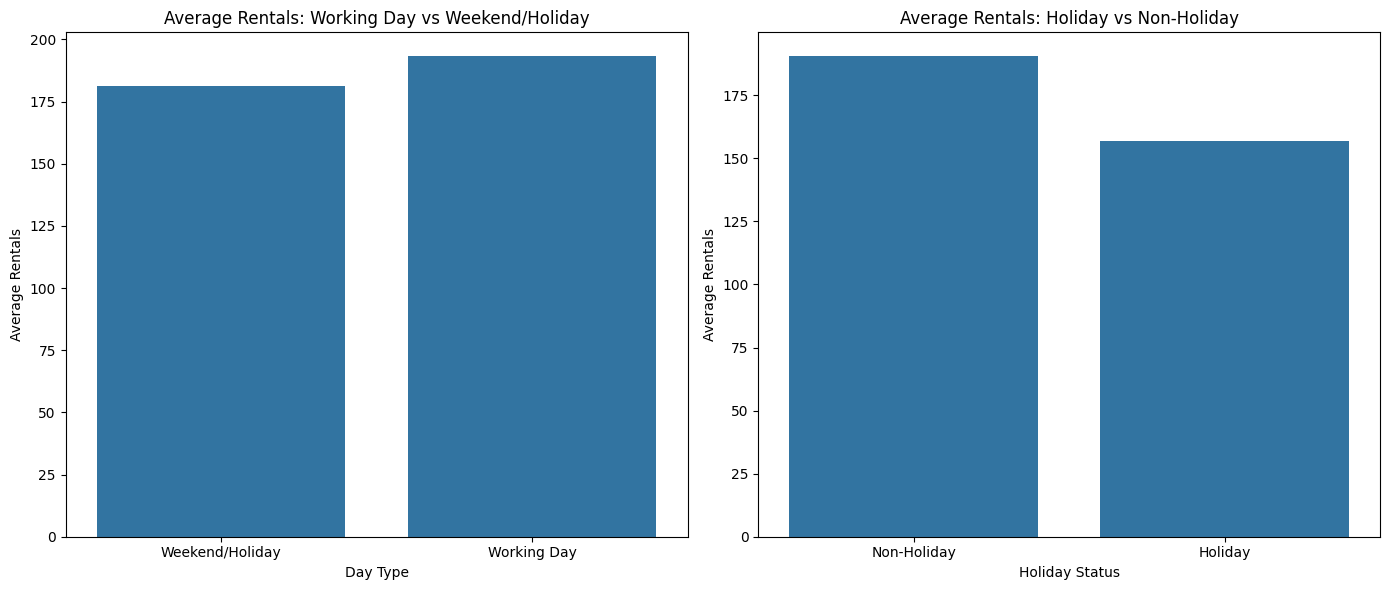

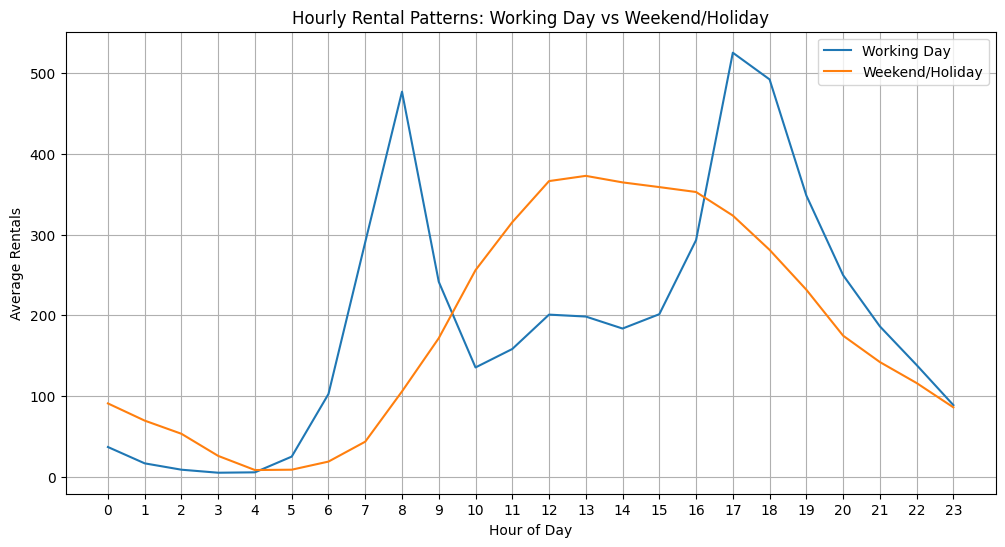

In [12]:
# Visualization for working day vs holiday impact
plt.figure(figsize=(14, 6))

# Working day analysis
plt.subplot(1, 2, 1)
sns.barplot(x='workingday', y='cnt', data=day_df, estimator=np.mean, ci=None)
plt.title('Average Rentals: Working Day vs Weekend/Holiday')
plt.xlabel('Day Type')
plt.ylabel('Average Rentals')

# Holiday analysis
plt.subplot(1, 2, 2)
sns.barplot(x='holiday', y='cnt', data=day_df, estimator=np.mean, ci=None)
plt.title('Average Rentals: Holiday vs Non-Holiday')
plt.xlabel('Holiday Status')
plt.ylabel('Average Rentals')

plt.tight_layout()
plt.show()

# Hourly pattern comparison
plt.figure(figsize=(12, 6))
working_day_hourly = hour_df[hour_df['workingday'] == 'Working Day'].groupby('hr')['cnt'].mean()
non_working_day_hourly = hour_df[hour_df['workingday'] == 'Weekend/Holiday'].groupby('hr')['cnt'].mean()

plt.plot(working_day_hourly.index, working_day_hourly.values, label='Working Day')
plt.plot(non_working_day_hourly.index, non_working_day_hourly.values, label='Weekend/Holiday')
plt.title('Hourly Rental Patterns: Working Day vs Weekend/Holiday')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.legend()
plt.grid()
plt.show()

**Insight:**

Secara rata-rata, jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur atau akhir pekan.

Namun, pola penyewaan harian menunjukkan perbedaan yang menarik:

Pada hari kerja, terdapat dua puncak yang jelas pada jam 8 pagi dan 5-6 sore, yang mungkin terkait dengan jam berangkat dan pulang kerja.

Pada hari libur/akhir pekan, pola penyewaan lebih merata sepanjang hari dengan puncak sekitar tengah hari.

Hari libur nasional (holiday) menunjukkan jumlah penyewaan yang sedikit lebih rendah dibandingkan hari biasa non-libur.

## Analisis Lanjutan (Opsional)

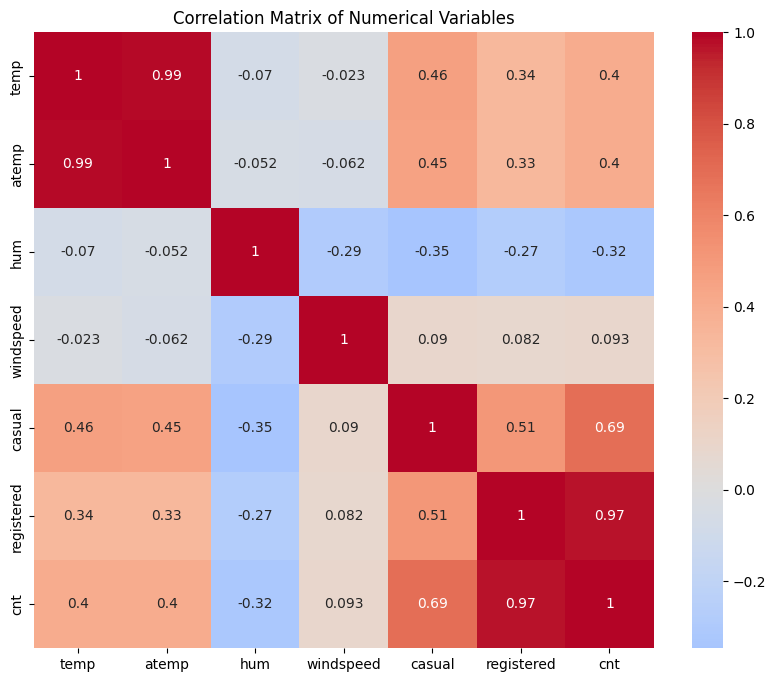

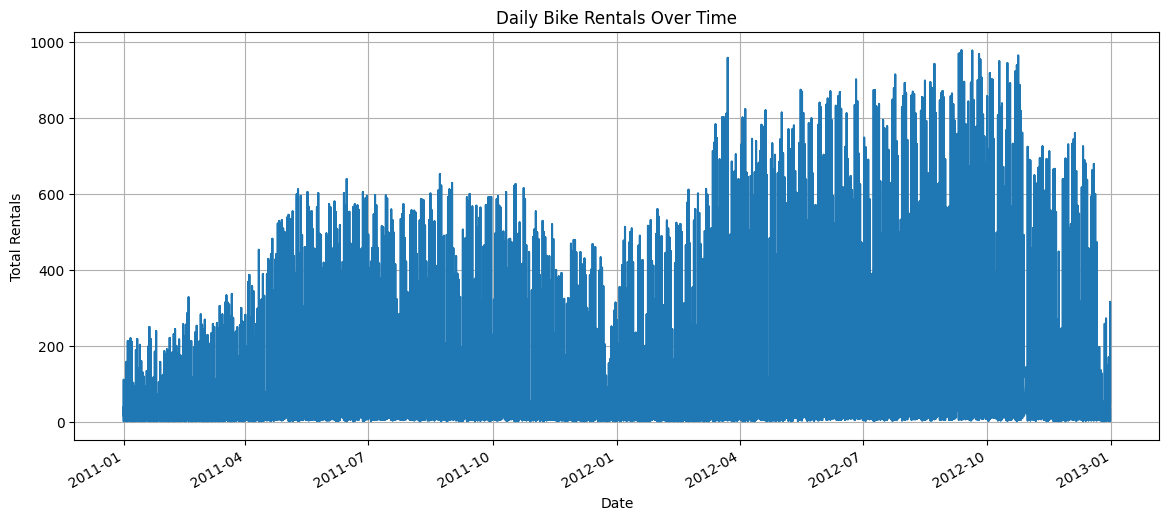

In [13]:
# Correlation analysis
plt.figure(figsize=(10, 8))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.heatmap(day_df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Time series analysis
plt.figure(figsize=(14, 6))
day_df.set_index('dteday')['cnt'].plot()
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()

## Conclusion

Conclution pertanyaan 1
Pola penggunaan sepeda sangat dipengaruhi oleh faktor musim dan cuaca. Musim gugur (Fall) adalah periode dengan permintaan tertinggi, sementara musim semi (Spring) memiliki permintaan terendah. Kondisi cuaca yang baik (cerah/sedikit awan) secara signifikan meningkatkan jumlah penyewaan sepeda. Rekomendasi untuk bisnis adalah mempersiapkan stok sepeda yang memadai selama musim gugur dan musim panas, serta memberikan promosi selama musim semi untuk meningkatkan permintaan.

Conclution pertanyaan 2
Terdapat perbedaan signifikan dalam pola penyewaan sepeda antara hari kerja dan hari libur. Hari kerja memiliki jumlah penyewaan yang lebih tinggi secara keseluruhan dengan pola yang jelas terkait jam komuter, sementara hari libur menunjukkan pola penggunaan yang lebih merata sepanjang hari. Bisnis dapat mempertimbangkan untuk menyesuaikan distribusi sepeda berdasarkan pola ini - lebih banyak di stasiun dekat perkantoran pada jam sibuk hari kerja, dan lebih merata di berbagai lokasi wisata selama akhir pekan/hari libur.